In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.mixture as mix

In [17]:
data = pd.read_excel('N225.xlsx', sheet_name='N225 Volume').dropna()
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-06-10,11470.919922,11522.040039,11370.209961,11370.209961,11370.209961,37900.0
1,2002-06-11,11390.410156,11514.530273,11390.410156,11449.440430,11449.440430,39600.0
2,2002-06-12,11392.320313,11405.290039,11261.929688,11327.059570,11327.059570,42800.0
3,2002-06-13,11366.059570,11396.280273,11132.589844,11144.839844,11144.839844,46500.0
4,2002-06-14,11121.889648,11127.160156,10911.070313,10920.629883,10920.629883,112800.0
5,2002-06-17,10858.049805,10888.040039,10577.889648,10664.110352,10664.110352,56400.0
6,2002-06-18,10799.429688,10884.259766,10747.679688,10839.929688,10839.929688,48100.0
7,2002-06-19,10757.030273,10771.599609,10448.700195,10476.179688,10476.179688,58000.0
8,2002-06-20,10467.219727,10629.440430,10325.549805,10612.980469,10612.980469,60200.0
9,2002-06-21,10489.780273,10489.780273,10327.910156,10354.349609,10354.349609,45800.0


In [37]:
dates = data['Date'].values
opens = data['Open'].values
closes = data['Close'].values
highs = data['High'].values
lows = data['Low'].values
adjcloses = data['Adj Close'].values

# The factors:
opclsp = ((data['Open']-data['Close'])/data['Open']).values*100# % change in price during the day
highlowsp = ((data['High']-data['Low'])/data['Close']).values*100 # Spread of high low
prc_ret = data['Close'].pct_change().fillna(0)*100 # Daily price change
data['Return Daily'] = prc_ret
Vol_change = data['Volume'].pct_change().fillna(0)*100
Vol_change[Vol_change==np.inf] = 0
log_ret = np.log((prc_ret+100)/100)

In [71]:
def get_rolling_vol(vol_wind,lst):
    vol_lst = []
    for i in range(len(lst)):
        if i<vol_wind:
            vol_lst.append(0)
        else:
            vol_lst.append(np.std(lst[i-vol_wind:i]))
    return np.array(vol_lst)
vol30 = get_rolling_vol(30, data['Close'])
vol100 = get_rolling_vol(100, prc_ret)
vol250 = get_rolling_vol(250, data['Close'])
#vol500 = get_rolling_vol(500, data['Close'])
#vol1000 = get_rolling_vol(1000, data['Close'])

In [58]:
vol100[100:]

array([1.76149431, 1.76458569, 1.76373165, ..., 0.97205169, 0.94408673,
       0.91475456])

In [59]:
np.append(dates[0:500],dates[800:])

array(['2002-06-10T00:00:00.000000000', '2002-06-11T00:00:00.000000000',
       '2002-06-12T00:00:00.000000000', ...,
       '2019-06-06T00:00:00.000000000', '2019-06-07T00:00:00.000000000',
       '2019-06-10T00:00:00.000000000'], dtype='datetime64[ns]')

In [101]:
#def to_float(nparray):
#    for i in range(len(nparray)):
#        nparray[i] = round(nparray[i],4)
#    return nparray

def slicer(array, train_p):
    a_shape = array.shape
    head = array[0:train_p[0]]
    tail = array[train_p[1]:]
    ret = np.append(head,tail)
    return ret.reshape(int(len(ret)/a_shape[1]),a_shape[1])

to_float = lambda x : [round(x[i],4) for i in range(len(x))]
    
def structuring_data(train_p,
                     window,
                     vollst=vol250):
    hl = highlowsp[window:]
    oc = opclsp[window:]
    pr = prc_ret[window:]
    date = dates[window:]
    vc = Vol_change[window:]
    lr = log_ret[window:]
    vol = vollst[window:]
    log_diff = np.append([0],np.diff(lr))
    x = np.column_stack([lr])
    lengthx = len(x)
    #x_train, x_test, dates_train, dates_test = model_selection.train_test_split(x, dates[window:], test_size = 0.2, random_state = 2019)
    x_train, x_test, dates_train, dates_test = x[train_p[0]:train_p[1]], slicer(x,train_p), date[train_p[0]:train_p[1]],np.append(date[0:train_p[0]], date[train_p[1]:])
    #return x_train
    model = mix.GaussianMixture(n_components=2,covariance_type="full")
    model.fit(x_train)
    train_hiddens = model.predict(x_train)
    print('Training Period Variances:')
    print(np.diag(model.covariances_[0]))
    print(np.diag(model.covariances_[1]))
    hiddens = model.predict(x_test)
    print('Score:',model.score(x_test))
    print('States 1: %d. States 2: %d.'%(len(hiddens[hiddens==0]),len(hiddens[hiddens==1])))
    np.set_printoptions(suppress=True)
    print('The means of state 0:')
    print(model.means_[0])
    #print('HighLow Spread: %.6f, OpenClose Spread: %.6f, Prc_ret: %.6f'
    #      %(model.means_[0][0],model.means_[0][1],model.means_[0][2]))
    
    print('The means of state 1:')
    print(model.means_[1])
    #print('HighLow Spread: %.6f, OpenClose Spread: %.6f, Prc_ret: %.6f'
    #      %(model.means_[1][0],model.means_[1][1],model.means_[1][2]))
    print(len(x_test),len(dates_test))
    closes00, dates00 = x_train[train_hiddens==0], dates_train[train_hiddens==0]
    closes01, dates01 = x_train[train_hiddens==1], dates_train[train_hiddens==1]
    
    closes10, dates10 = x_test[hiddens==0], dates_test[hiddens==0]
    closes11, dates11 = x_test[hiddens==1], dates_test[hiddens==1]
    
    print(len(hiddens),len(closes10),len(dates10),len(closes11),len(dates11))
    return [hiddens, closes10, dates10, closes11, dates11, train_hiddens,closes00, dates00, closes01, dates01]

Training Period Variances:
[0.00054396]
[0.00010213]
Score: 3.0841008284778018
States 1: 55. States 2: 743.
The means of state 0:
[-0.00284441]
The means of state 1:
[0.00144212]
798 798
798 55 55 743 743
For testing period:
Dates in state 1: 55 Dates in state 2: 743


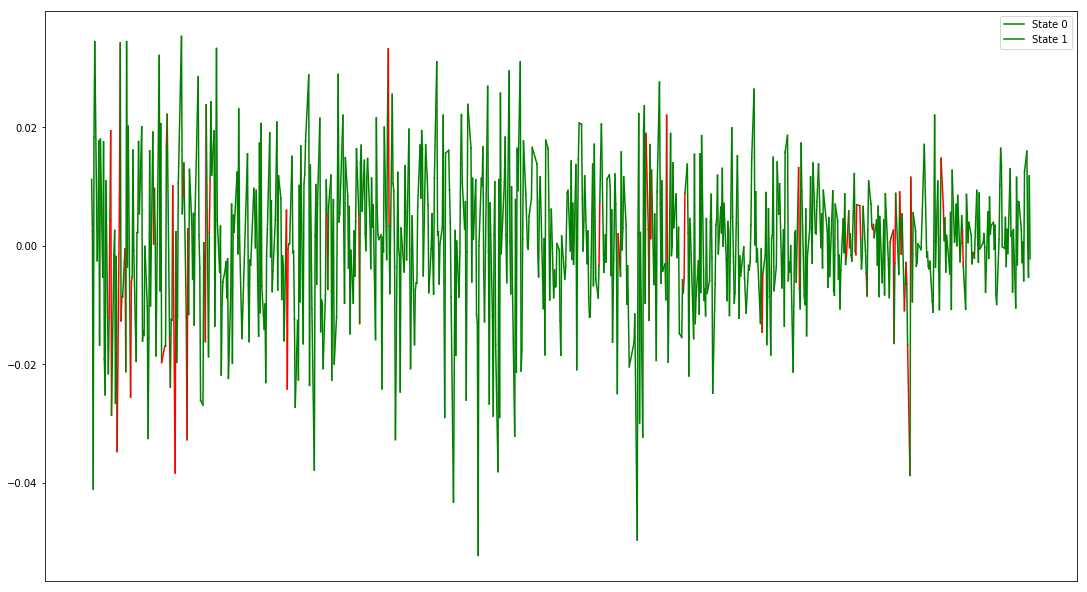

In [105]:
wind = 10
ret = structuring_data((0,3360), wind, get_rolling_vol(10, prc_ret))
print('For testing period:')
print('Dates in state 1:',len(ret[1]), 'Dates in state 2:',len(ret[3]))

fig2 = plt.figure()
fig2.set_size_inches(18.5, 10.5)
plt.xticks([])

#for i1 in range(1,len(ret[5])):#len(closes)-1):
#    plt.plot([dates[wind:][i1-1],dates[wind:][i1]],[closes[wind:][i1-1],closes[wind:][i1]],color='b')

for i1 in range(1,len(ret[0])):#len(closes)-1):
    if ret[0][i1]==0:
        plt.plot([dates[wind:][i1-1],dates[wind:][i1]],[log_ret.values[wind:][i1-1],log_ret.values[wind:][i1]],color='r')
    else:
        plt.plot([dates[wind:][i1-1],dates[wind:][i1]],[log_ret.values[wind:][i1-1],log_ret.values[wind:][i1]],color='g')
plt.legend(['State 0','State 1'])
plt.show()

For traning period:
Dates in state 1: 462 Dates in state 2: 2898


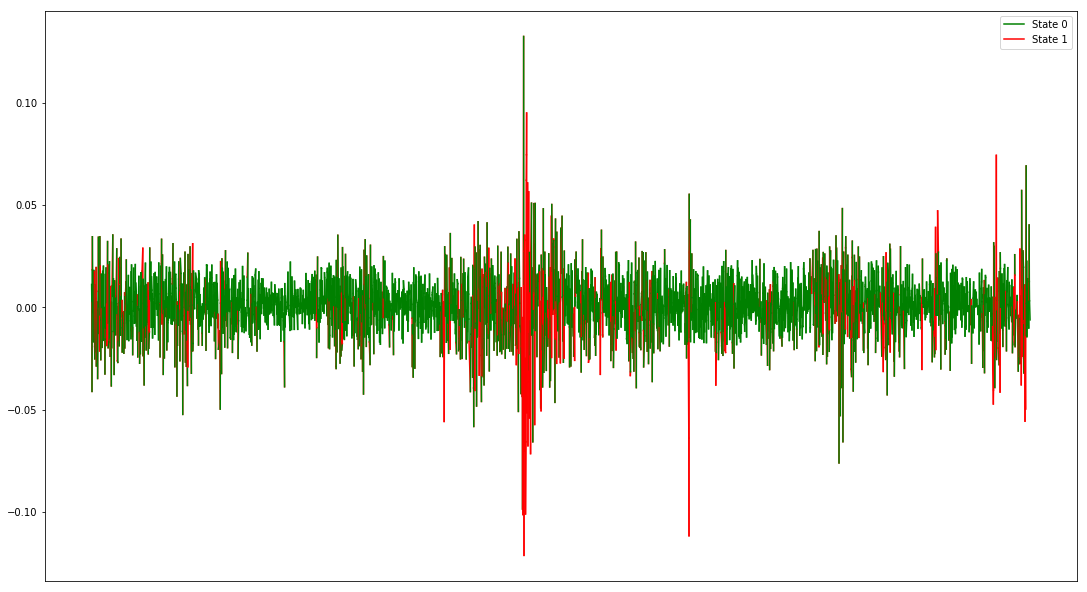

In [106]:
print('For traning period:')
print('Dates in state 1:',len(ret[6]), 'Dates in state 2:',len(ret[8]))

fig2 = plt.figure()
fig2.set_size_inches(18.5, 10.5)
plt.xticks([])

#for i1 in range(1,len(ret[5])):#len(closes)-1):
#    plt.plot([dates[wind:][i1-1],dates[wind:][i1]],[closes[wind:][i1-1],closes[wind:][i1]],color='b')

for i1 in range(1,len(ret[5])):#len(closes)-1):
    if ret[5][i1]==0:
        plt.plot([dates[wind:][i1-1],dates[wind:][i1]],[log_ret.values[wind:][i1-1],log_ret.values[wind:][i1]],color='r')
    else:
        plt.plot([dates[wind:][i1-1],dates[wind:][i1]],[log_ret.values[wind:][i1-1],log_ret.values[wind:][i1]],color='g')
plt.legend(['State 0','State 1'])
plt.show()

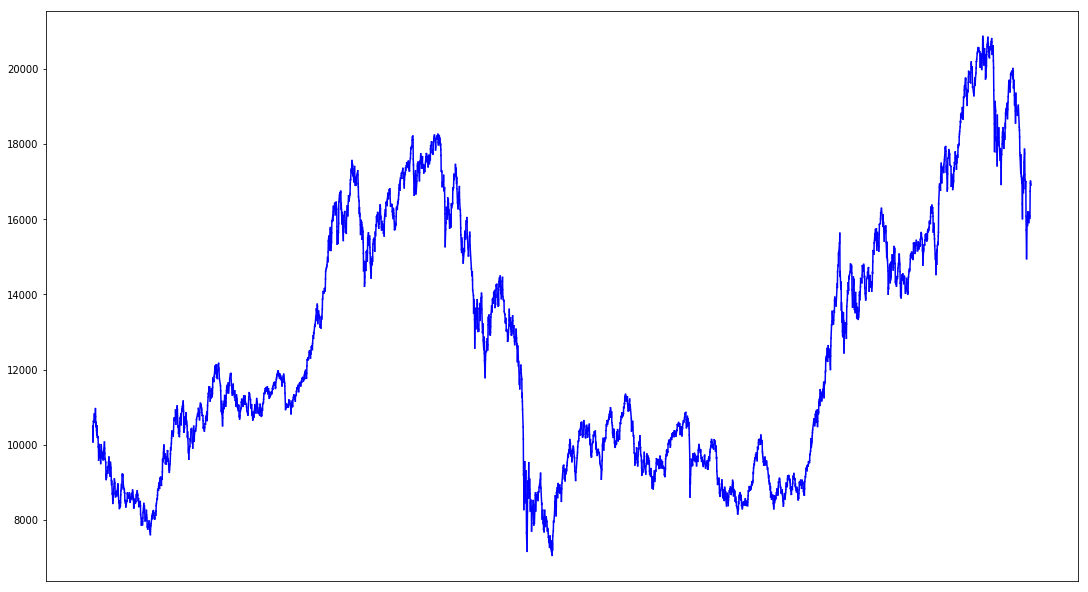

In [108]:
fig2 = plt.figure()
fig2.set_size_inches(18.5, 10.5)
plt.xticks([])
for i1 in range(1,len(ret[5])):
    plt.plot([dates[wind:][i1-1],dates[wind:][i1]],[closes[wind:][i1-1],closes[wind:][i1]],color='b')

D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


Score: 35133.292626620794
States 1: 1764. States 2: 815.
The means of state 0:
Diff%: 0.000841, HighLow Spread: 0.003998, OpenClose Spread: 0.000034, Prc_ret: 0.000875
The means of state 1:
Diff%: -0.001332, HighLow Spread: 0.018245, OpenClose Spread: -0.000750, Prc_ret: -0.000906
2579 1764 1764 815 815
Dates in state 1: 1764 Dates in state 2: 815


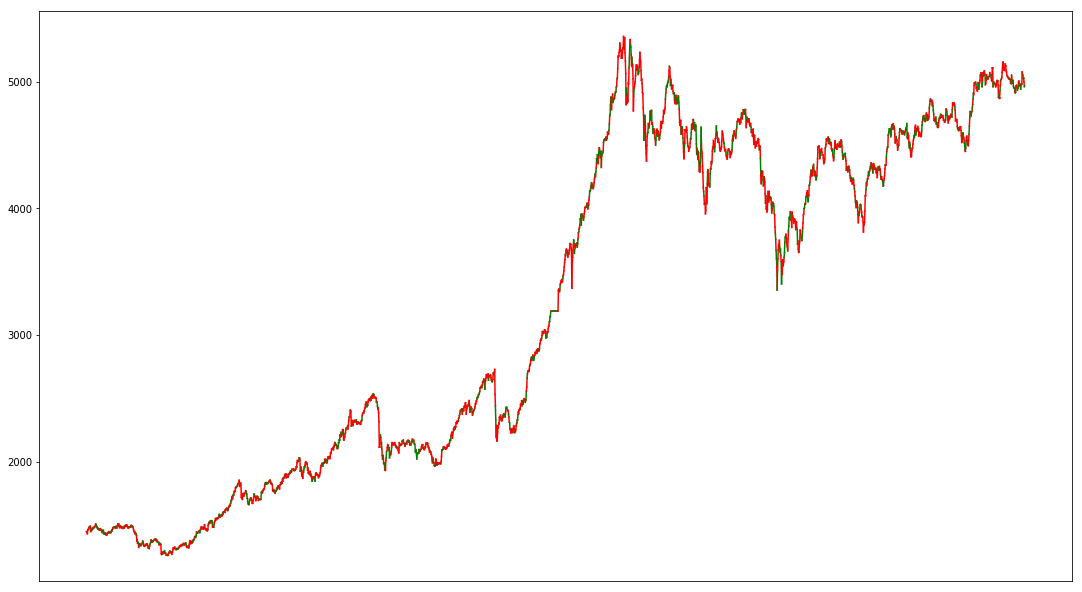

In [15]:
wind = 500
ret = structuring_data((0,3360), wind, vol500)
print('Dates in state 1:',len(ret[1]),'Dates in state 2:',len(ret[3]))

fig2 = plt.figure()
fig2.set_size_inches(18.5, 10.5)
plt.xticks([])
for i1 in range(1,len(ret[0])):#len(closes)-1):
    if ret[0][i1]==0:
        plt.plot([dates[wind:][i1-1],dates[wind:][i1]],[closes[wind:][i1-1],closes[wind:][i1]],color='r')
    else:
        plt.plot([dates[wind:][i1-1],dates[wind:][i1]],[closes[wind:][i1-1],closes[wind:][i1]],color='g')
plt.show()

D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


Score: 33567.41290408722
States 1: 1720. States 2: 759.
The means of state 0:
Diff%: 0.000871, HighLow Spread: 0.004400, OpenClose Spread: 0.000069, Prc_ret: 0.000905
The means of state 1:
Diff%: -0.001067, HighLow Spread: 0.018632, OpenClose Spread: -0.000412, Prc_ret: -0.000625
2479 1720 1720 759 759
Dates in state 1: 1720 Dates in state 2: 759


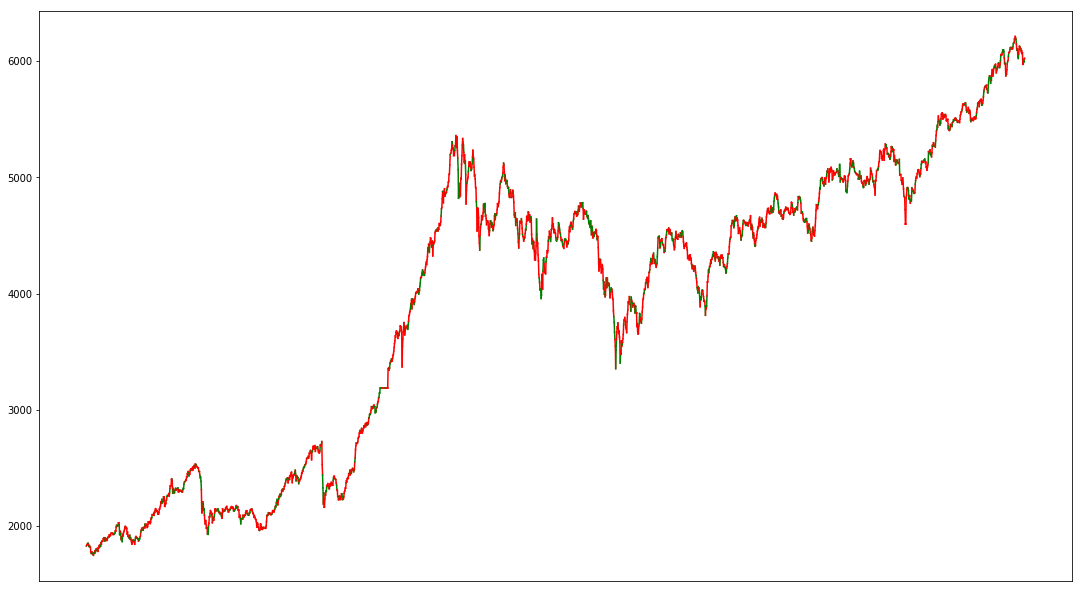

In [14]:
wind = 1000
ret = structuring_data(wind, vol1000)
print('Dates in state 1:',len(ret[1]),'Dates in state 2:',len(ret[3]))

fig2 = plt.figure()
fig2.set_size_inches(18.5, 10.5)
plt.xticks([])
for i1 in range(1,len(ret[0])):#len(closes)-1):
    if ret[0][i1]==0:
        plt.plot([dates[wind:][i1-1],dates[wind:][i1]],[closes[wind:][i1-1],closes[wind:][i1]],color='r')
    else:
        plt.plot([dates[wind:][i1-1],dates[wind:][i1]],[closes[wind:][i1-1],closes[wind:][i1]],color='g')
plt.show()

# Cross Validation

# Back-Testing